# Geometrisches Beispiel für das Newton-Verfahren

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu, solve_triangular

Gesucht ist die Lösung des folgenden quadratischen Gleichungssystems

$$\begin{split}
    x^2+2 y^2 & = 4\\
    2 x^2+2 x y+2 x+4 (y-1)^2 & = 1.
\end{split}$$

Das Probelm als Nullstellengleichung formuliert, folgt sofort

$$\begin{split}
    x^2+2 y^2 - 4& = 0\\
    2 x^2+2 x y+2 x+4 (y-1)^2 - 1& = 0.
\end{split}$$

In [2]:
def f1(x,y):
    return x**2+2*y**2-4
def f2(x,y):
    return 2*x**2+2*x*y+2*x+4*(y-1)**2-1
def f(x,y):
    return np.array([f1(x,y), f2(x,y)])

Das Problem kann sehr schön graphisch veranschaulicht werden: Gesucht ist der Schnittpunkt der beiden Niveaukurven.

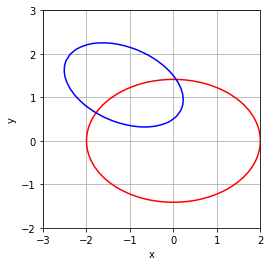

In [3]:
x, y = np.mgrid[-3:2:40j,-2:3:40j]
plt.contour(x,y,f1(x,y),0,colors=['r'])
plt.contour(x,y,f2(x,y),0,colors=['b'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.gca().set_aspect(1)
plt.show()

Für die Jacobimatrix:

In [4]:
def df(x,y):
    return np.array([[2*x, 4*y], [4*x+2*y+2, 2*x+8*(y-1)]])

Für das Newton-Verfahren folgt:

In [5]:
# Initialisierung
x = np.array([-1.5,0.75])
step = 0

# Tolerance
tol = 1e-12
maxStep = 5

# Newton
res = np.linalg.norm(f(*x))
while res > tol and step < maxStep:
    A = df(*x)
    b = f(*x)
    P,L,U = lu(A)
    z = solve_triangular(L,P.T@b,lower=True)
    delta = solve_triangular(U,z,lower=False)
    x -= delta
    
    res = np.linalg.norm(f(*x))
    step += 1
    print(step, x, res)

1 [-1.83888889  0.61944444] 0.4140702991395938
2 [-1.78280885  0.64257596] 0.011802960001363898
3 [-1.78111898  0.64328028] 1.0785697097939478e-05
4 [-1.78111743  0.64328093] 9.040471502624296e-12
5 [-1.78111743  0.64328093] 8.881784197001252e-16


In [6]:
x1 = np.array(x)

Wir erhalten als Resultat den ersten Schnittpunkt (-1.78111743  0.64328093).

Für den Startwert (0.2,1.2) folgt der zweite Schnittpunkt (0.06379775 1.41349387):

In [7]:
# Initialisierung
x = np.array([0.2,1.2])
step = 0

# Tolerance
tol = 1e-12
maxStep = 5

# Newton
res = np.linalg.norm(f(*x))
while res > tol and step < maxStep:
    A = df(*x)
    b = f(*x)
    P,L,U = lu(A)
    z = solve_triangular(L,P.T@b,lower=True)
    delta = solve_triangular(U,z,lower=False)
    x -= delta
    
    res = np.linalg.norm(f(*x))
    step += 1
    print(step, x, res)

1 [0.08675497 1.43443709] 0.22821500709204776
2 [0.06436127 1.41372157] 0.003892498548507132
3 [0.06379792 1.41349394] 1.1763731298426577e-06
4 [0.06379775 1.41349387] 1.0791116511384048e-13


In [8]:
x2 = np.array(x)

Die Frage stellt sich oft, gegen welchen Punkt konvergiert das Verfahren. Die Antwort darauf ist sehr komplex (Mandelbrot-Mengen). Um die Frage zu erörtern packen wir das Newton-Verfahren in eine eigene Methode und analysieren die Konvergenz gegen welchen Punkt bzw. erfassen die Divergenz.

In [9]:
def newton(x,maxStep=5):
    # Initialisierung
    step = 0

    # Tolerance
    tol = 1e-12
    maxStep = 5

    # Newton
    res = np.linalg.norm(f(*x))
    while res > tol and step < maxStep:
        A = df(*x)
        b = f(*x)
        P,L,U = lu(A)
        z = solve_triangular(L,P.T@b,lower=True)
        delta = solve_triangular(U,z,lower=False)
        x -= delta

        res = np.linalg.norm(f(*x))
        step += 1
        #print(step, x, res)
    
    if np.linalg.norm(x-x1) < 1e-6:
        return 1
    elif np.linalg.norm(x-x2) < 1e-6:
        return 2
    else:
        return 0

In [10]:
xs = np.linspace(-3,2,100)
ys = np.linspace(-2,3,100)
mat = np.array([[newton(np.array([x,y])) for x in xs] for y in ys])

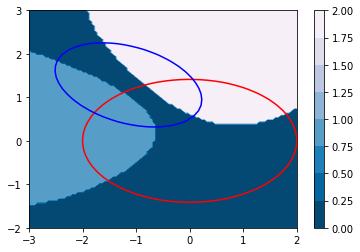

In [11]:
from matplotlib import cm
fig, ax = plt.subplots()
cs = ax.contourf(xs, ys, mat,cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)
x, y = np.mgrid[-3:2:40j,-2:3:40j]
plt.contour(x,y,f1(x,y),0,colors=['r'])
plt.contour(x,y,f2(x,y),0,colors=['b'])
plt.show()